In [80]:
import pandas as pd
import matplotlib.pyplot as plt
df_zip.info()
df.info()

In [106]:
path_zip = "/Users/rexpeters/Desktop/project3/zip_code_demographics.csv"
df_zip = pd.read_csv(path_zip)



ValueError: invalid literal for int() with base 10: '98033-6314'

In [98]:
path = "/Users/rexpeters/Desktop/project3/startup_data.csv"
df = pd.read_csv(path)
category_counts = df.groupby("category_code").size()

# Optionally convert to a DataFrame for better readability
category_counts = category_counts.reset_index(name="count")

print(category_counts)
df.columns

       category_code  count
0        advertising     62
1          analytics     19
2         automotive      2
3            biotech     34
4          cleantech     23
5         consulting      3
6          ecommerce     25
7          education      4
8         enterprise     73
9            fashion      8
10           finance      6
11       games_video     52
12          hardware     27
13            health      3
14       hospitality      1
15     manufacturing      2
16           medical      7
17         messaging     11
18            mobile     79
19             music      6
20   network_hosting     34
21              news      8
22             other     11
23       photo_video      7
24  public_relations     25
25       real_estate      3
26            search     12
27          security     19
28     semiconductor     35
29            social     14
30          software    153
31            sports      1
32    transportation      2
33            travel      8
34               web

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [107]:
df['zip_code'] = df['zip_code'].str.split('-').str[0]


ValueError: invalid literal for int() with base 10: 'Maryland 21045'

In [113]:
df['zip_code'] = df['zip_code'].str.split('-').str[0]
df['zip_code'] = df['zip_code'].str.extract(r'(\d{5})')  # Extract the first 5-digit sequence

AttributeError: Can only use .str accessor with string values!

In [111]:
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')  # Ensure numeric format
df.dropna(subset=['zip_code'], inplace=True)  # Drop rows without valid ZIP codes
df['zip_code'] = df['zip_code'].astype('int64')


In [114]:
df_merged = pd.merge(df, df_zip, on='zip_code', how='left')
len(df_merged)

825

In [85]:
import pandas as pd

# Load the CSV file
path = "/Users/rexpeters/Desktop/project3/startup_data.csv"
df = pd.read_csv(path)

# Drop the column 'state_code.1'
df = df.drop(columns=['state_code.1'])

# Save the cleaned DataFrame to a new file
cleaned_path = "/Users/rexpeters/Desktop/project3/startup_data_cleaned.csv"
df.to_csv(cleaned_path, index=False)

print(f"Cleaned CSV saved to: {cleaned_path}")


Cleaned CSV saved to: /Users/rexpeters/Desktop/project3/startup_data_cleaned.csv


In [54]:
dataframe = df.drop([
    'Unnamed: 0',      # Not useful for our analysis. 
    'id',              # Not useful for our analysis. 
    'Unnamed: 6',      # Not useful for our analysis. 
    'object_id',       # Not useful for our analysis. 
    'labels',          # Information already included in "status" column.
    'state_code.1',    # Information already included in "state" column.
    'is_CA',           # Information already included in "state" column.
    'is_NY',           # Information already included in "state" column.
    'is_MA',           # Information already included in "state" column.
    'is_TX',           # Information already included in "state" column.
    'is_otherstate',   # Information already included in "state" column.
], axis=1).copy()

In [55]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   founded_at                923 non-null    object 
 7   closed_at                 335 non-null    object 
 8   first_funding_at          923 non-null    object 
 9   last_funding_at           923 non-null    object 
 10  age_first_funding_year    923 non-null    float64
 11  age_last_funding_year     923 non-null    float64
 12  age_first_milestone_year  771 non-null    float64
 13  age_last_milestone_year   771 non-null    float64
 14  relationsh

In [76]:
# Create separate DataFrames for each column where the value is 1
web_df = dataframe[dataframe["is_web"] == 1]
software_df = dataframe[dataframe["is_software"] == 1]
mobile_df = dataframe[dataframe["is_mobile"] == 1]
enterprise_df = dataframe[dataframe["is_enterprise"] == 1]
advertising_df = dataframe[dataframe["is_advertising"] == 1]
gamesvideo_df = dataframe[dataframe["is_gamesvideo"] == 1]
ecommerce_df = dataframe[dataframe["is_ecommerce"] == 1]
biotech_df = dataframe[dataframe["is_biotech"] == 1]
consulting_df = dataframe[dataframe["is_consulting"] == 1]
othercategory_df = dataframe[dataframe["is_othercategory"] == 1]



   state_code   latitude   longitude zip_code        city            name  \
2          CA  32.901049 -117.192656    92121   San Diego           Plixi   
9          CA  37.427235 -122.145783    94306   Palo Alto        Doostang   
11         CA  37.452992 -122.185098    94025  Menlo Park        Center'd   
12         KY  38.241467  -85.724511    40204  Louisville  Resonant Vibes   
18         NY  40.730646  -73.986614    10004    New York  SinglePlatform   

   founded_at  closed_at first_funding_at last_funding_at  ...  \
2   3/18/2009        NaN        3/30/2010       3/30/2010  ...   
9    6/1/2005        NaN         2/1/2007        2/5/2010  ...   
11   1/1/2006  12/2/2011         2/1/2007        5/3/2011  ...   
12   1/1/2004  4/27/2012       11/25/2008      11/25/2008  ...   
18   1/1/2010        NaN        9/29/2010        8/1/2011  ...   

    is_othercategory  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
2                  0       0          0           1          

In [77]:
# Print the length of each DataFrame
print(f"Length of web_df: {len(web_df)}")
print(f"Length of software_df: {len(software_df)}")
print(f"Length of mobile_df: {len(mobile_df)}")
print(f"Length of enterprise_df: {len(enterprise_df)}")
print(f"Length of advertising_df: {len(advertising_df)}")
print(f"Length of gamesvideo_df: {len(gamesvideo_df)}")
print(f"Length of ecommerce_df: {len(ecommerce_df)}")
print(f"Length of biotech_df: {len(biotech_df)}")
print(f"Length of consulting_df: {len(consulting_df)}")
print(f"Length of othercategory_df: {len(othercategory_df)}")


Length of web_df: 144
Length of software_df: 153
Length of mobile_df: 79
Length of enterprise_df: 73
Length of advertising_df: 62
Length of gamesvideo_df: 52
Length of ecommerce_df: 25
Length of biotech_df: 34
Length of consulting_df: 3
Length of othercategory_df: 298


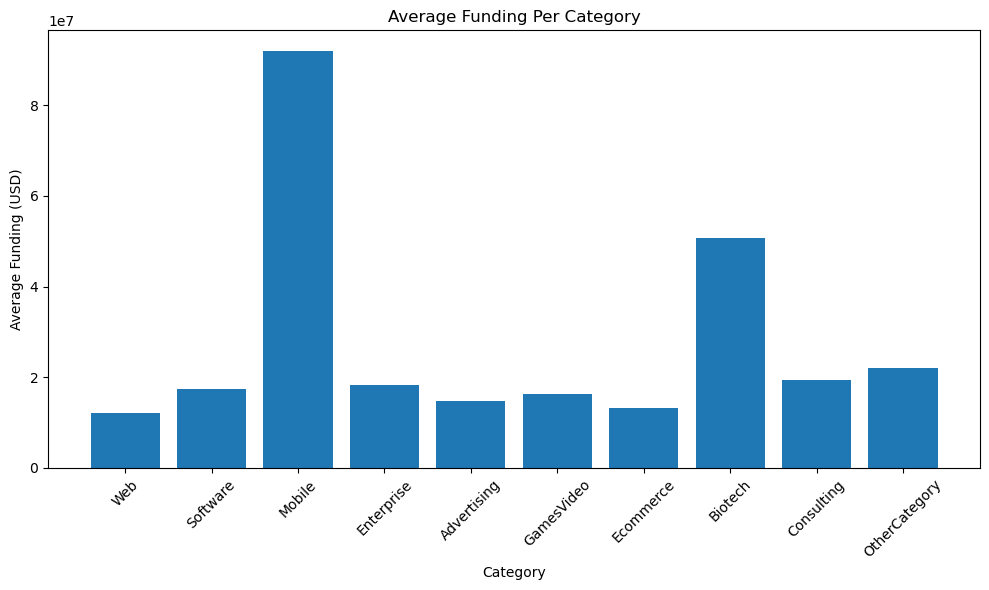

In [81]:

# Calculate the average funding for each category
average_funding = {
    "Web": web_df["funding_total_usd"].mean(),
    "Software": software_df["funding_total_usd"].mean(),
    "Mobile": mobile_df["funding_total_usd"].mean(),
    "Enterprise": enterprise_df["funding_total_usd"].mean(),
    "Advertising": advertising_df["funding_total_usd"].mean(),
    "GamesVideo": gamesvideo_df["funding_total_usd"].mean(),
    "Ecommerce": ecommerce_df["funding_total_usd"].mean(),
    "Biotech": biotech_df["funding_total_usd"].mean(),
    "Consulting": consulting_df["funding_total_usd"].mean(),
    "OtherCategory": othercategory_df["funding_total_usd"].mean(),
}

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_funding.keys(), average_funding.values())
plt.title("Average Funding Per Category")
plt.xlabel("Category")
plt.ylabel("Average Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


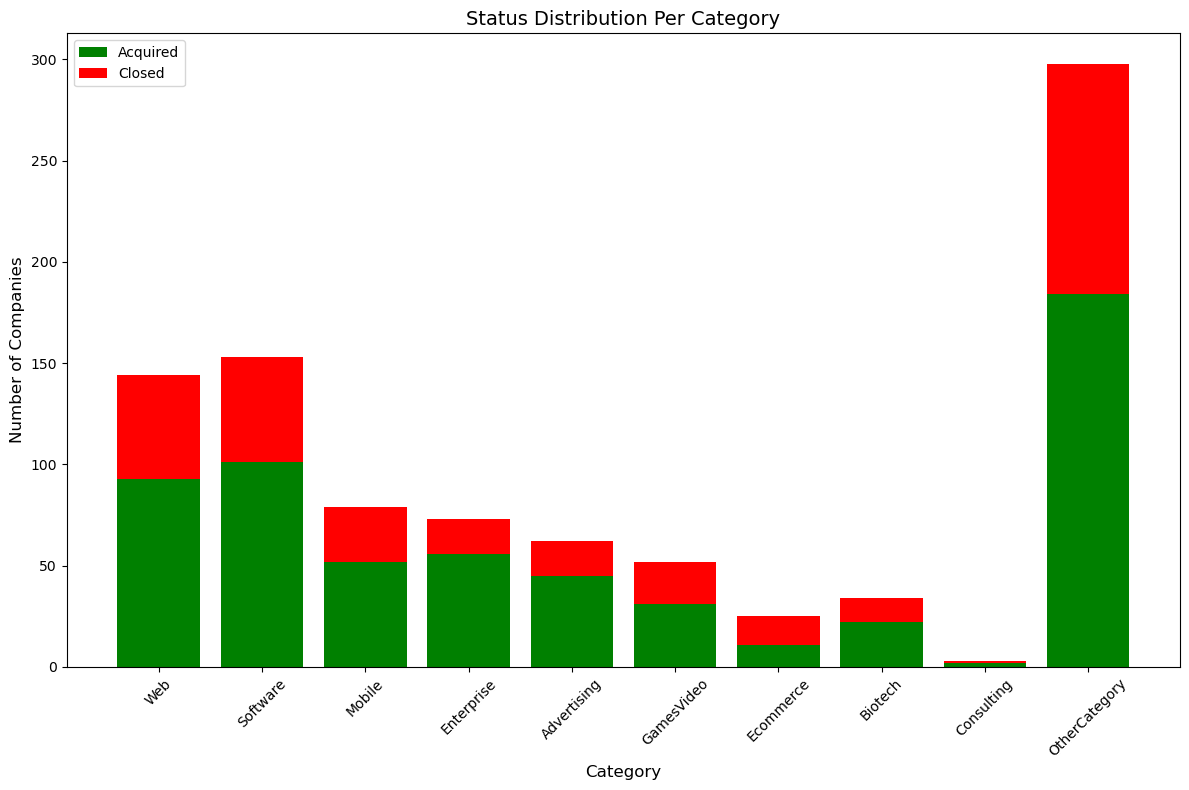

In [83]:
import matplotlib.pyplot as plt

# List of categories
categories = [
    ("Web", web_df),
    ("Software", software_df),
    ("Mobile", mobile_df),
    ("Enterprise", enterprise_df),
    ("Advertising", advertising_df),
    ("GamesVideo", gamesvideo_df),
    ("Ecommerce", ecommerce_df),
    ("Biotech", biotech_df),
    ("Consulting", consulting_df),
    ("OtherCategory", othercategory_df)
]

# Calculate counts of "acquired" and "closed" for each category
acquired_counts = []
closed_counts = []

for category, df in categories:
    acquired_counts.append(len(df[df["status"] == "acquired"]))
    closed_counts.append(len(df[df["status"] == "closed"]))

# Plotting the stacked bar chart
x = [category for category, df in categories]  # Category names for x-axis
plt.figure(figsize=(12, 8))
plt.bar(x, acquired_counts, label="Acquired", color="green")
plt.bar(x, closed_counts, bottom=acquired_counts, label="Closed", color="red")

# Customizing the plot
plt.title("Status Distribution Per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


35

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''